In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) == 0:
    raise RuntimeError("No GPU devices found. Make sure to enable GPU acceleration in Colab.")

# Allow GPU memory growth to avoid potential issues
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [ ]:
class UNet:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.model = self.build_model()

    def build_model(self):
        inputs = tf.keras.Input(shape=self.input_shape)

        # Encoder
        conv1 = self.conv_block(inputs, 64)
        conv2 = self.conv_block(conv1, 128)
        conv3 = self.conv_block(conv2, 256)

        # Decoder
        up1 = layers.Conv2DTranspose(128, (2, 2), strides=(1, 1), padding='same')(conv3)
        concat1 = layers.concatenate([conv2, up1], axis=-1)
        conv4 = self.conv_block(concat1, 128)

        up2 = layers.Conv2DTranspose(64, (2, 2), strides=(1, 1), padding='same')(conv4)
        concat2 = layers.concatenate([conv1, up2], axis=-1)
        conv5 = self.conv_block(concat2, 64)

        outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv5)

        model = models.Model(inputs, outputs)

        return model

    def conv_block(self, x, filters):
        x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
        x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
        return x

    def compile_model(self):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, batch_size, epochs, validation_data):
        history = self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=validation_data)
        return history


In [ ]:
def plot_training_history(history):
    # Plot training history (loss and accuracy)
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
def main():
  # Load dataset
  (x_train, _), (x_test, _) = mnist.load_data()

  # Preprocess data
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

  # Create binary masks for training
  y_train = x_train.copy()
  y_train[y_train > 0.5] = 1.0
  y_train[y_train <= 0.5] = 0.0

  # Split data into training and validation sets
  x_train, x_val, y_train, y_val, = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

  # Create UNet model
  unet = UNet(input_shape=(28, 28, 1))
  unet.compile_model()

  # Train the model
  history = unet.train(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

  # Plot training history
  plot_training_history(history)

  # Evaluate the model on the test set
  test_loss, test_acc = unet.model.evaluate(x_test, x_test)
  print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

  # Generate predictions on the test set
  y_pred = unet.model.predict(x_test)
  y_pred_binary = (y_pred > 0.5).astype('float32')



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 96s 52ms/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.0053 - val_accuracy: 0.9976
Epoch 2/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 3/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 4/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9988
Epoch 5/10
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9988
Epoch 6/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9990
Epoch 7/10
1500/1500 [==============================] - 70s

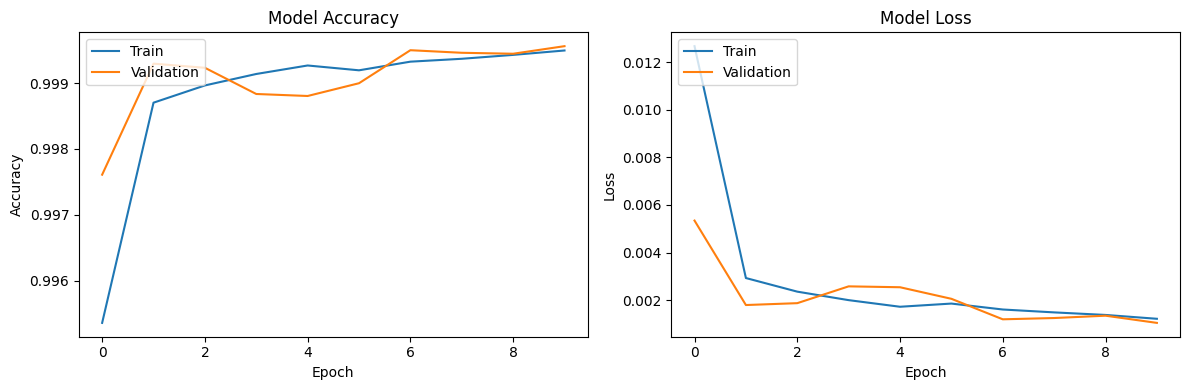

313/313 [==============================] - 6s 17ms/step - loss: 0.5548 - accuracy: 0.8145
Test Loss: 0.5548368692398071, Test Accuracy: 0.8144918084144592
313/313 [==============================] - 5s 14ms/step


In [ ]:
if __name__ == '__main__':
  main()

overview of the code:

U-Net Architecture: The U-Net architecture is a convolutional neural network commonly used for image segmentation tasks. It consists of an encoder-decoder structure with skip connections to preserve spatial information.

Data Preparation:

The MNIST dataset is loaded, and the data is preprocessed to be in the shape suitable for the U-Net model (28x28 images with a single channel).
Binary masks are created from the training images by thresholding at 0.5.
U-Net Class:

The UNet class is defined with methods to build the U-Net model (build_model), define convolutional blocks (conv_block), and compile the model (compile_model).
The build_model method constructs the U-Net architecture with an encoder and decoder.
Training:

The main function loads the dataset, preprocesses the data, and splits it into training and validation sets.
An instance of the UNet class is created, the model is compiled, and then it is trained using the training data and validated using the validation data.
Binary Crossentropy Loss:

The model is compiled with the Adam optimizer and binary crossentropy loss, which is commonly used for binary classification problems.
Binary Mask Creation:

The task here is binary image segmentation, where the goal is to predict binary masks indicating the presence or absence of an object.
Thresholding:

The thresholding step in the data preparation phase converts pixel values greater than 0.5 to 1.0 and those less than or equal to 0.5 to 0.0, effectively creating binary masks.
Training Loop:

The train method of the UNet class is used to train the model for a specified number of epochs with the specified batch size.